# Vignette

For more information regarding the motiviation for (py)clustree, please refer to the original publication by the authors of the R version of clustree: [https://doi.org/10.1093/gigascience/giy083](https://doi.org/10.1093/gigascience/giy083)

`pyclustree` is currently under active development. While it is already usable, feature parity with the R version has not yet been reached and breaking changes will occur. To ensure proper reproducibility of your scripts, please fix the version number of `pyclustree` when using it.

## Create example data

In [1]:
%pip install -q scanpy python-igraph

Note: you may need to restart the kernel to use updated packages.


In [2]:
import scanpy as sc

adata = sc.datasets.pbmc3k_processed()

# Run leiden clustering for different resolutions
for resolution in [0.2, 0.4, 0.6, 0.8, 1.0]:
    sc.tl.leiden(
        adata,
        resolution=resolution,
        flavor="igraph",
        n_iterations=2,
        key_added=f"leiden_{str(resolution).replace('.', '_')}",
    )

## Plot the clustree

In [3]:
from pyclustree import clustree

fig = clustree(
    adata,
    [f"leiden_{str(resolution).replace('.', '_')}" for resolution in [0.2, 0.4, 0.6, 0.8, 1.0]],
    title="Clustree of PBMC3k",
    edge_weight_threshold=0.01,  # the minimum fraction of the parent cluster assigned to the child cluster to plot
)

ModuleNotFoundError: No module named 'pyclustree'

We can also use `node_color_gene` to color the nodes by the mean gene expression. Here, CD8+ T cells seem to initially be mixed with other cells at low resolutions.

[0.16771404, 0.07329165, 0.016309345, 0.016627219, 0.0, 0.096412696, 0.32962894, 0.016213968, 0.016245637, 0.023901626, 0.0, 0.095215, 0.3307045, 0.016213968, 0.016373554, 0.020386681, 0.0, 0.09023418, 0.08937381, 0.47341636, 0.016213968, 0.012783452, 0.028100561, 0.020386681, 0.0, 0.0896338, 0.0857584, 0.46214265, 0.016213968, 0.012836059, 0.026659507, 0.019804206, 0.0] 33


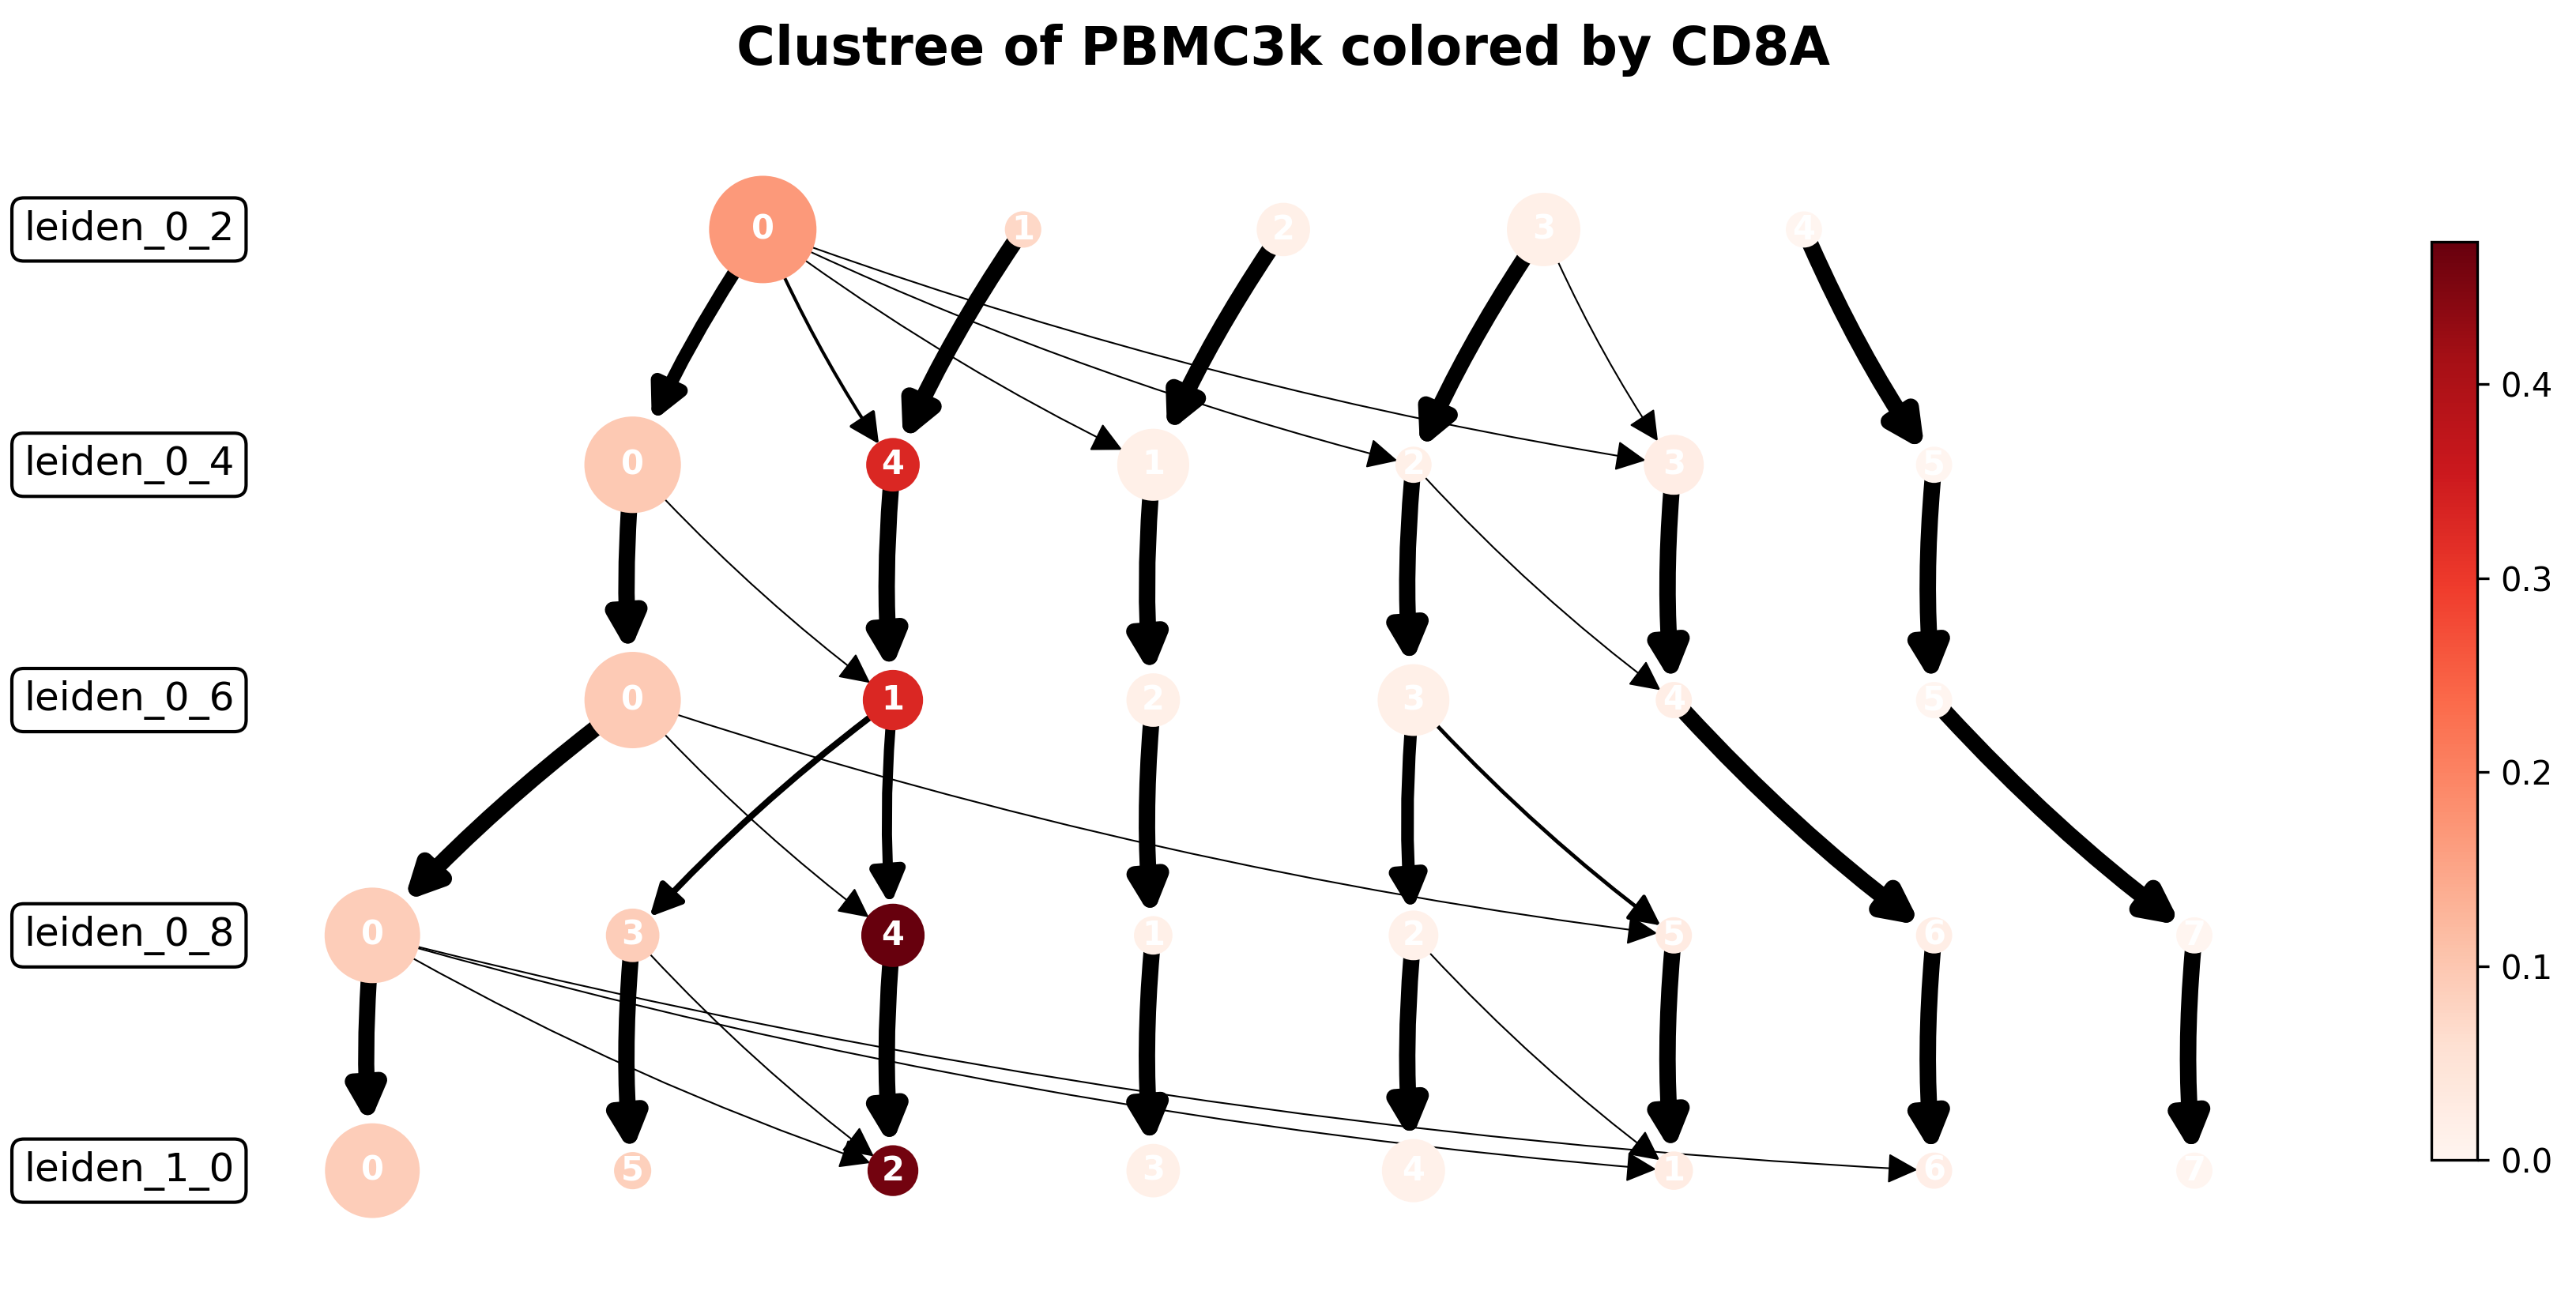

In [4]:
fig = clustree(
    adata,
    [f"leiden_{str(resolution).replace('.', '_')}" for resolution in [0.2, 0.4, 0.6, 0.8, 1.0]],
    title="Clustree of PBMC3k colored by CD8A",
    node_color_gene="CD8A",
    node_colormap="Reds",
    show_colorbar=True,
)